In [95]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from sklearn.metrics import r2_score

In [96]:
df = pd.read_csv('laptop.csv')
df.head(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
5,Acer,Notebook,4,2.10,9.967026,0,0,100.454670,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,16,2.04,11.644108,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,11.030615,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,16,1.30,11.285443,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows
9,Acer,Ultrabook,8,1.60,10.621952,0,1,157.350512,Intel Core i5,0,256,Intel,Windows


In [97]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [98]:
df.shape

(1273, 13)

In [99]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD              int64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

### Preprocessing

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [101]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [102]:
columns_to_analyze = ['Company', 'TypeName',"Ram","Cpu_brand","Cpu_brand","Gpu_brand","Os"]

# Iterate over the specified columns
for column in columns_to_analyze:
    unique_values_count = df[column].nunique()
    print(f"Number of unique values in '{column}' column: {unique_values_count}")
    print("____________________________________________________________________")

Number of unique values in 'Company' column: 19
____________________________________________________________________
Number of unique values in 'TypeName' column: 6
____________________________________________________________________
Number of unique values in 'Ram' column: 9
____________________________________________________________________
Number of unique values in 'Cpu_brand' column: 5
____________________________________________________________________
Number of unique values in 'Cpu_brand' column: 5
____________________________________________________________________
Number of unique values in 'Gpu_brand' column: 3
____________________________________________________________________
Number of unique values in 'Os' column: 3
____________________________________________________________________


In [103]:
duplicates = df.duplicated().sum()
duplicates

1

In [104]:
df = df.drop_duplicates()
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [105]:
# Menghitung Z-score untuk kolom numerik
numeric_cols = ['Ram', 'Weight', 'Price', 'Ppi', 'HDD', 'SSD']
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Menentukan threshold untuk Z-score, biasanya 3
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Menampilkan data outlier
outliers_df = df[outliers]
print("Outliers detected:")
print(outliers_df)

# Menampilkan data non-outlier
non_outliers_df = df[~outliers]
print("\nNon-Outliers:")
print(non_outliers_df)

# Menghitung jumlah baris yang outlier
num_outliers = outliers.sum()

print(f"Jumlah baris yang dianggap sebagai outlier: {num_outliers}")

Outliers detected:
     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
33      Dell           Ultrabook   16    1.20  11.508720            1    0   
58       MSI              Gaming   16    2.43  11.778996            0    0   
60      Dell            Notebook   16    2.80  11.144911            0    0   
76    Lenovo            Notebook    8    2.20  10.227465            0    0   
111     Dell           Ultrabook    8    1.23  11.204675            1    0   
...      ...                 ...  ...     ...        ...          ...  ...   
1202    Dell           Ultrabook   16    1.20  11.869133            1    0   
1225    Dell           Ultrabook    8    1.29  11.273329            1    0   
1230   Razer              Gaming   16    1.95  12.135794            0    0   
1248    Dell  2 in 1 Convertible    8    1.24  11.478299            1    0   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   

             Ppi      Cpu_brand   HDD   SSD 

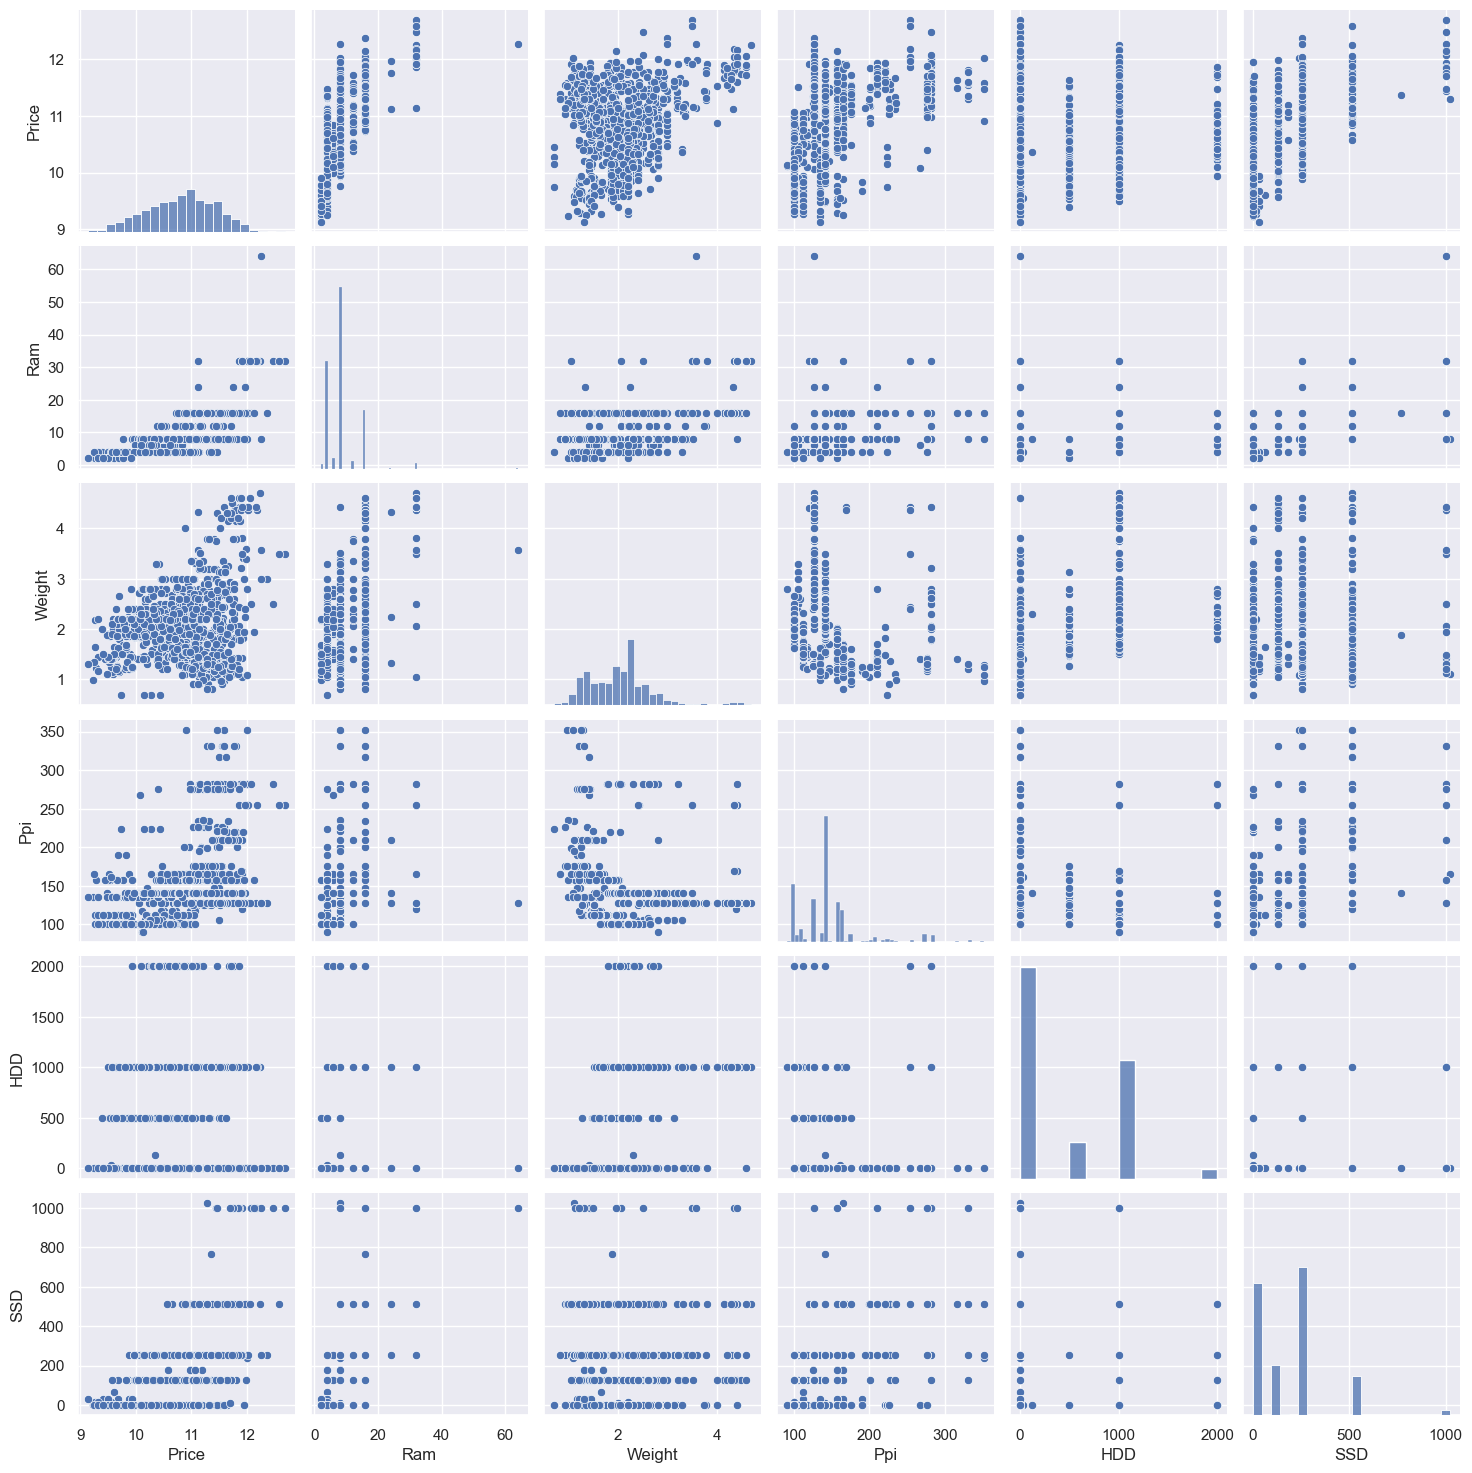

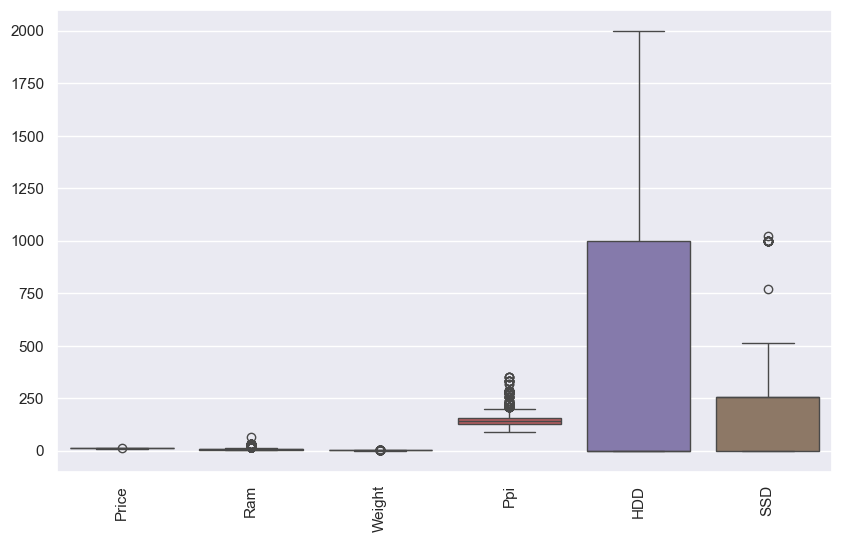

In [106]:
# Scatter plot untuk melihat distribusi data
sns.pairplot(df[['Price', 'Ram', 'Weight', 'Ppi', 'HDD', 'SSD']])
plt.show()

# Box plot untuk melihat outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Price', 'Ram', 'Weight', 'Ppi', 'HDD', 'SSD']])
plt.xticks(rotation=90)
plt.show()

In [107]:
# Menghapus data outlier
df_clean = df[~outliers]

print("Data setelah menghapus outlier:")
print(df_clean)

Data setelah menghapus outlier:
     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1267      HP             Netbook    2    1.17   9.317895            0    0   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              C

In [108]:
def get_X_y(df_clean):
    FEATURES = [
        "Company",
        "TypeName",
        "Ram",
        "Weight",
        "TouchScreen",
        "Ips",
        "Ppi",
        'Gpu_brand',
        "Cpu_brand",
        "HDD",
        "SSD",
        "Os"
    ]

    TARGET = "Price"

    X = df_clean[FEATURES]
    y = df_clean[TARGET]
    
    return X, y

In [109]:
X, y = get_X_y(df_clean)

In [110]:
categorical_columns = ['Company', 'TypeName', 'Cpu_brand', 'Os', 'Gpu_brand', 'Ram']

X = pd.get_dummies(X, columns=categorical_columns, dtype=int)

In [111]:
X

,Weight,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Os_Windows,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Ram_2,Ram_4,Ram_6,Ram_8,Ram_12,Ram_16
0,1.37,0,1,226.983005,0,128,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1.34,0,0,127.677940,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1.86,0,0,141.211998,0,256,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.83,0,1,220.534624,0,512,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1.37,0,1,226.983005,0,256,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.17,0,0,135.094211,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
1268,2.20,0,0,100.454670,500,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1269,1.80,1,1,157.350512,0,128,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1271,1.50,0,0,111.935204,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0


### Visualization

In [112]:
selected_columns = ['Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']
num_columns = X[selected_columns]

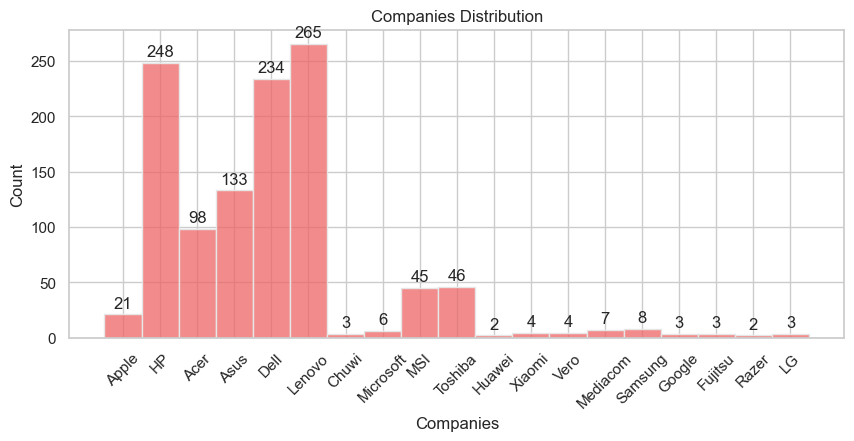

In [133]:
# Mengambil kolom Company
Companies = df_clean["Company"]

# Set style untuk plot
sns.set(style="whitegrid")

# Membuat figure untuk plot
plt.figure(figsize=(10, 4))

# Membuat histogram
ax = sns.histplot(Companies, bins=45, kde=False, color='#EE6666', edgecolor='#E6E6E6')

# Menambahkan judul dan label sumbu
plt.title("Companies Distribution")
plt.xlabel("Companies")
plt.ylabel("Count")

# Memutar label x-axis
plt.xticks(rotation=45)

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Menampilkan plot
plt.show()

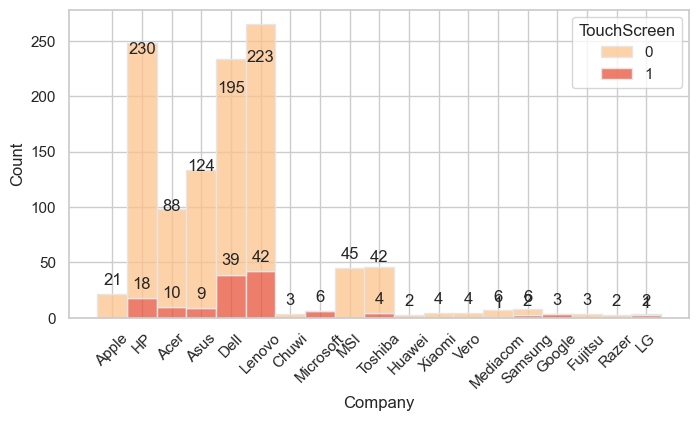

In [114]:
# Set style untuk plot
sns.set(style="whitegrid")

# Membuat figure untuk plot
plt.figure(figsize=(8, 4))

# Membuat histogram dengan hue untuk TouchScreen
ax = sns.histplot(data=df_clean, x="Company", hue="TouchScreen", multiple="stack", palette="OrRd", edgecolor='#E6E6E6')

# Memutar label x-axis
plt.xticks(rotation=45)

# Menambahkan angka di atas setiap bar
# Perlu menghitung posisi dan jumlah setiap bar
for p in ax.patches:
    if p.get_height() > 0:  # Menghindari anotasi untuk bar dengan tinggi 0
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

# Menampilkan plot
plt.show()

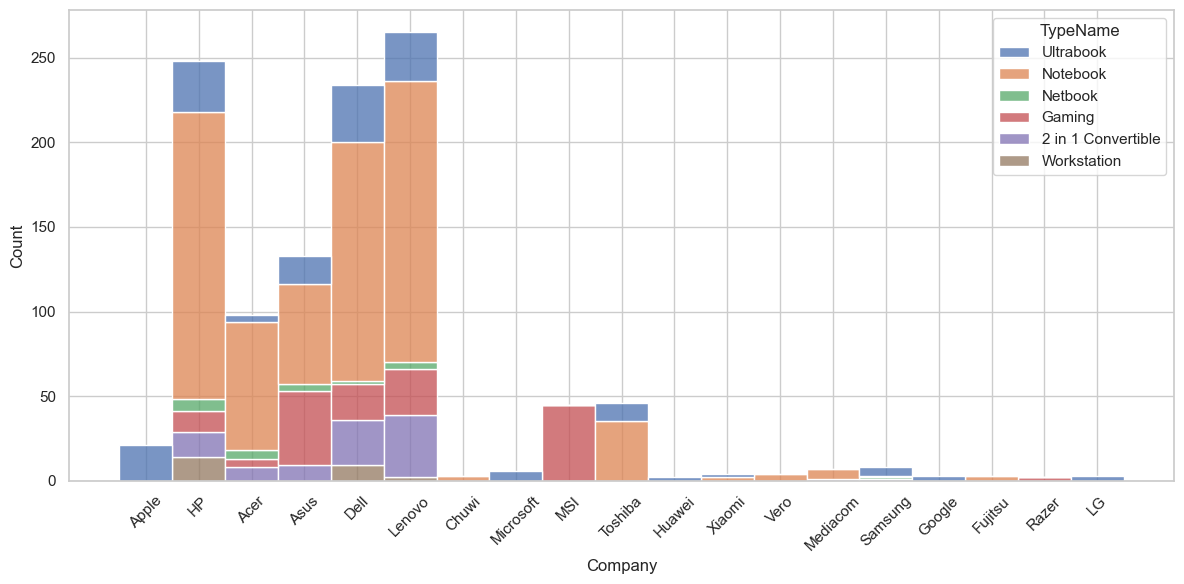

In [115]:
# Set style untuk plot
sns.set(style="whitegrid")

# Membuat histogram dengan hue untuk TypeName
plt.figure(figsize=(12, 6))  # Menentukan ukuran gambar secara eksplisit
ax = sns.histplot(data=df_clean, x="Company", hue="TypeName", multiple="stack", edgecolor='w')

# Menambahkan label axis
ax.set_xlabel("Company", fontsize=12)  # Menambahkan label x-axis
ax.set_ylabel("Count", fontsize=12)    # Menambahkan label y-axis

# Memutar label x-axis
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()

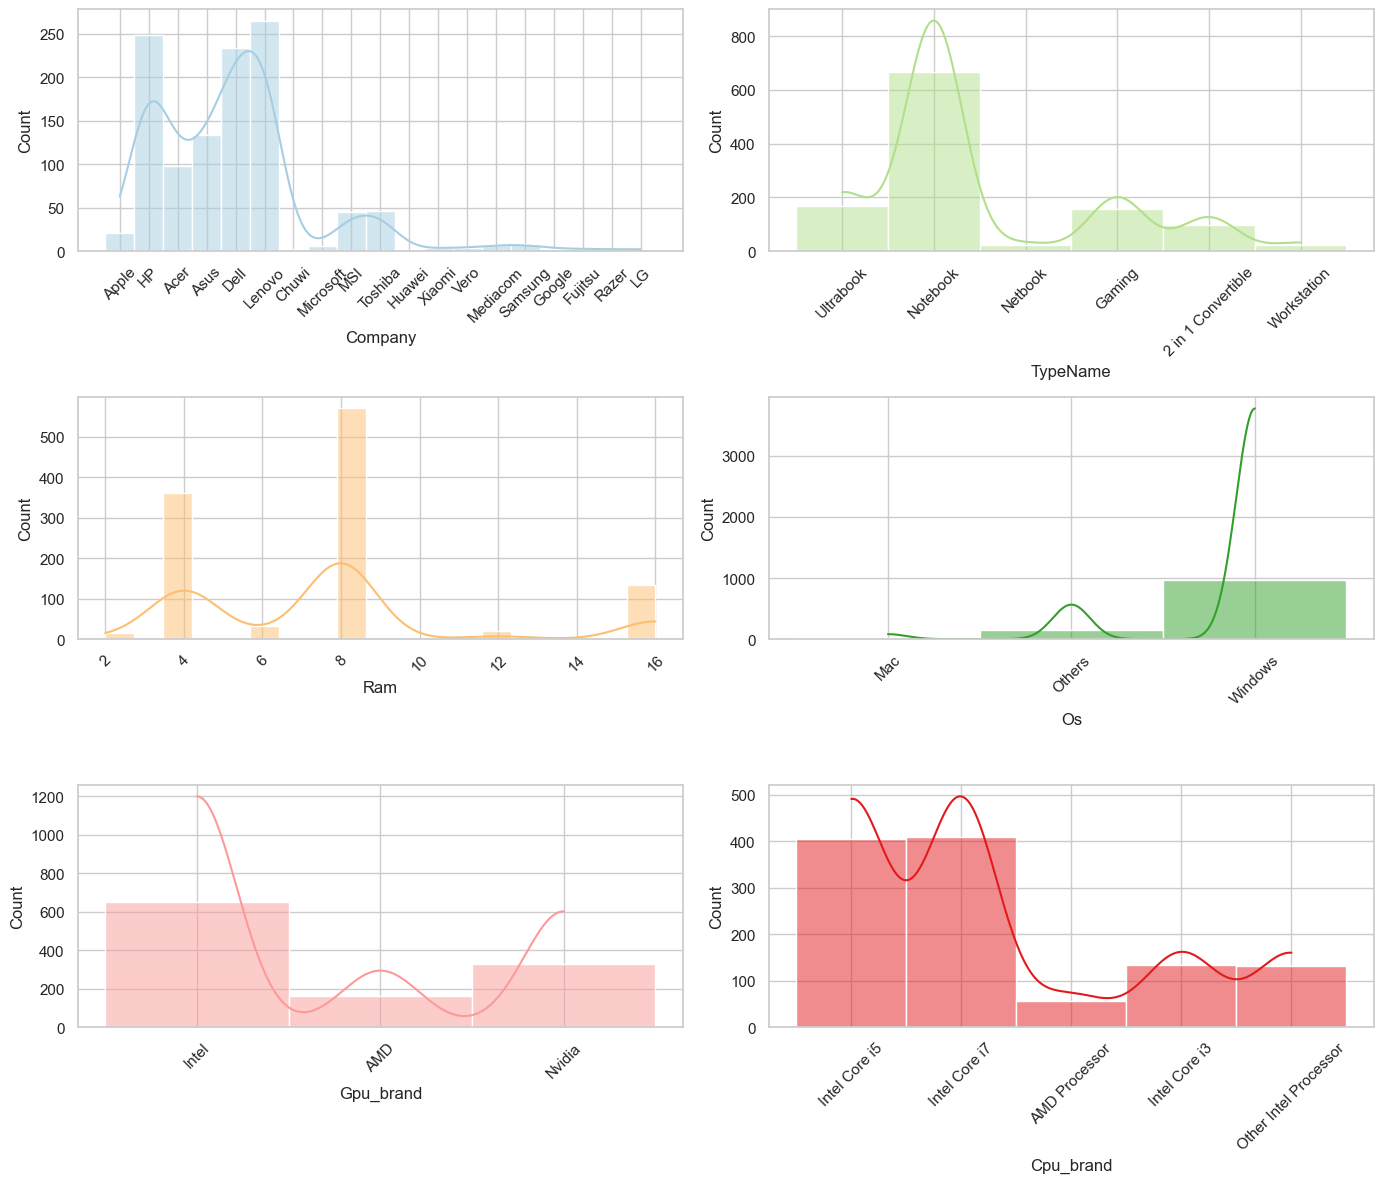

In [116]:
# Set style untuk plot
sns.set(style="whitegrid")

# Membuat subplot dengan ukuran gambar yang ditentukan
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Plot untuk Company
sns.histplot(data=df_clean, x="Company", kde=True, color="#a6cee3", ax=axs[0, 0])
# Plot untuk TypeName 
sns.histplot(data=df_clean, x="TypeName", kde=True, color="#b2df8a", ax=axs[0, 1])
# Plot untuk Ram 
sns.histplot(data=df_clean, x="Ram", kde=True, color="#fdbf6f", ax=axs[1, 0])
# Plot untuk Os 
sns.histplot(data=df_clean, x="Os", kde=True, color="#33a02c", ax=axs[1, 1])
# Plot untuk Gpu_brand
sns.histplot(data=df_clean, x="Gpu_brand", kde=True, color="#fb9a99", ax=axs[2, 0])
# Plot untuk Cpu_brand
sns.histplot(data=df_clean, x="Cpu_brand", kde=True, color="#e31a1c", ax=axs[2, 1])

# Memutar label x-axis untuk semua subplot
for ax in axs.flat:
    ax.tick_params(axis="x", labelrotation=45)

# Menampilkan plot dengan jarak antar subplot yang optimal
plt.tight_layout()
plt.show()

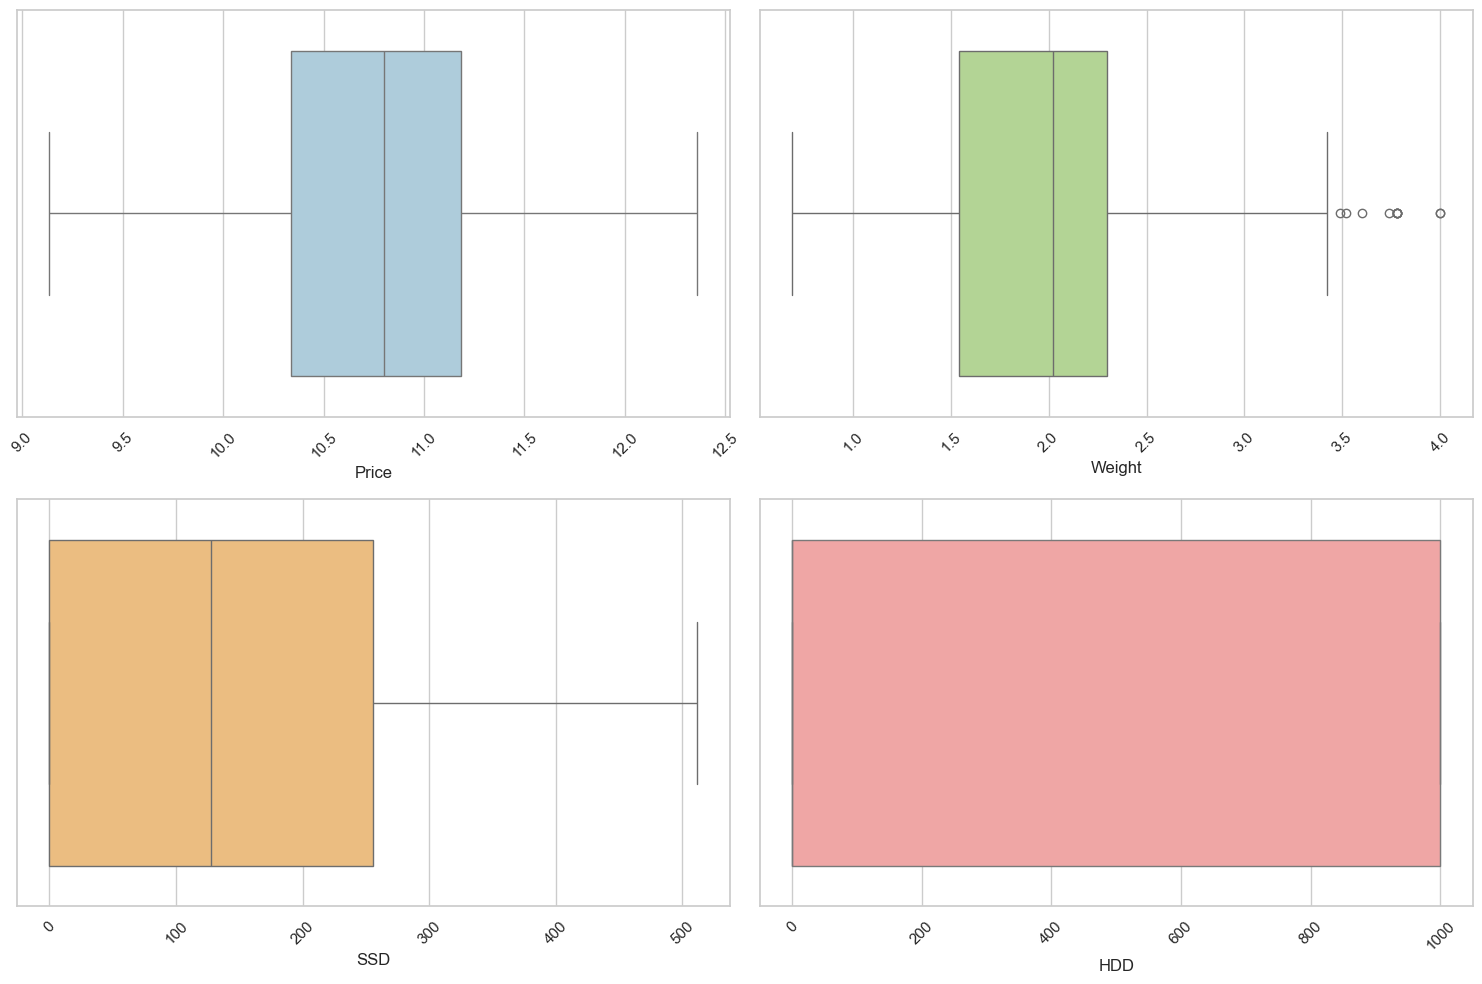

In [117]:
# Set style untuk plot
sns.set(style="whitegrid")

# Membuat subplot dengan ukuran gambar yang ditentukan
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Box plot untuk Price
sns.boxplot(data=df_clean, x="Price", ax=axs[0, 0], color="#a6cee3")
# Box plot untuk Weight
sns.boxplot(data=df_clean, x="Weight", ax=axs[0, 1], color="#b2df8a")
# Box plot untuk SSD
sns.boxplot(data=df_clean, x="SSD", ax=axs[1, 0], color="#fdbf6f")
# Box plot untuk HDD
sns.boxplot(data=df_clean, x="HDD", ax=axs[1, 1], color="#fb9a99")

# Memutar label x-axis untuk semua subplot
for ax in axs.flat:
    ax.tick_params(axis="x", labelrotation=45)

# Menampilkan plot dengan jarak antar subplot yang optimal
fig.tight_layout()
plt.show()

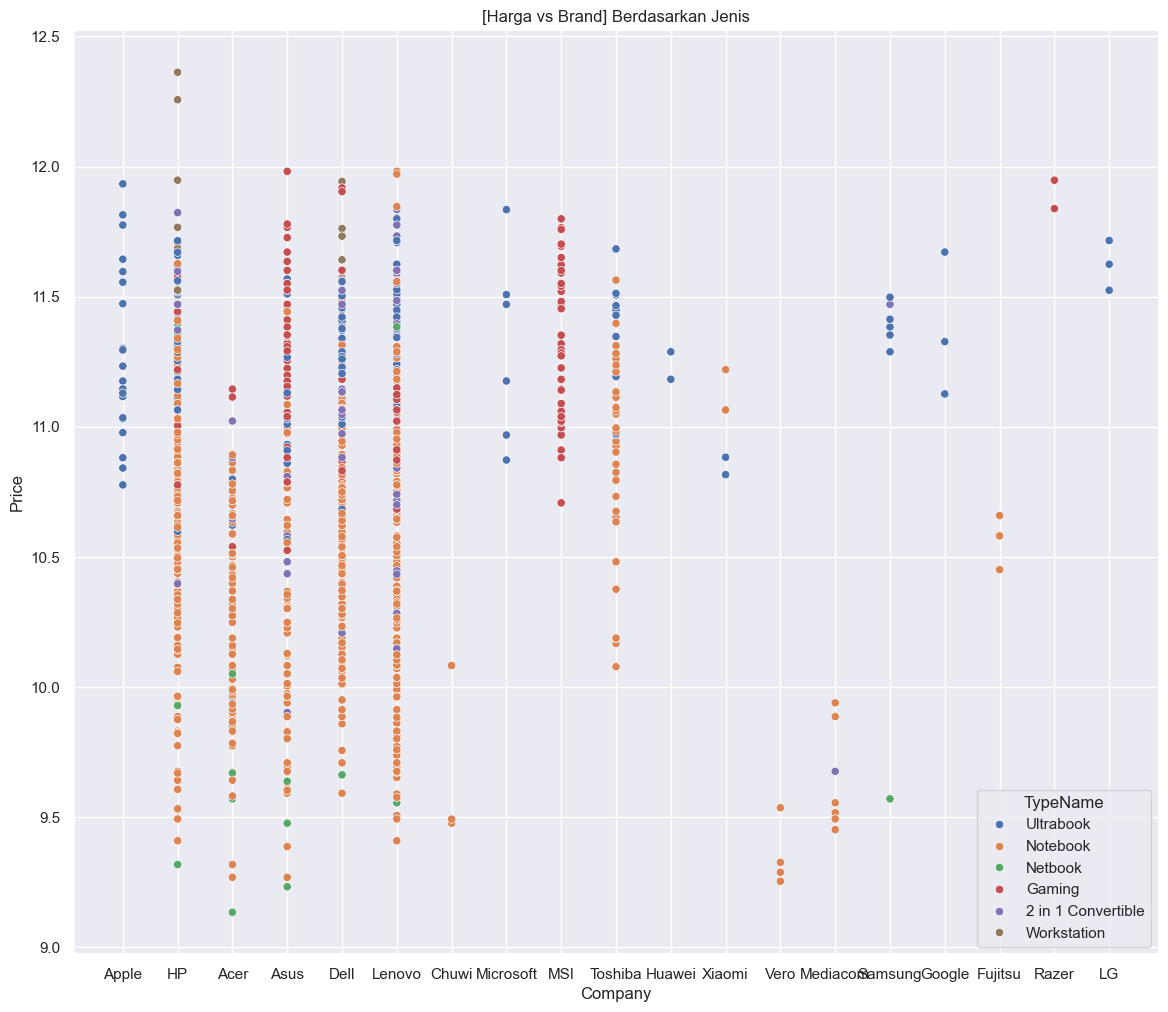

In [118]:
plt.figure(figsize=(14, 12))

# Mengatur gaya plot menjadi "darkgrid"
sns.set_style("darkgrid")

# Membuat scatter plot dengan data Company vs Price, dengan warna berdasarkan TypeName
sns.scatterplot(data=df_clean, x="Company", y="Price", hue="TypeName")

# Menambahkan judul plot
plt.title("[Harga vs Brand] Berdasarkan Jenis")

# Menampilkan plot
plt.show()

### Creating Models

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
print(f"X_train shape : {X_train.shape}\nX_train shape : {y_train.shape}\nX_train shape : {X_test.shape}\nX_train shape : {y_test.shape}")

X_train shape : (794, 48)
X_train shape : (794,)
X_train shape : (341, 48)
X_train shape : (341,)


#### Linear Regression

In [121]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_test_predicted = lin_reg.predict(X_test)

In [122]:
r2 = r2_score(y_test, y_test_predicted)

print(f"R-squared (Accuracy) Score: {r2_score(y_test, y_test_predicted):.2%}")

R-squared (Accuracy) Score: 80.33%


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Melatih model regresi linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Memprediksi nilai pada set pelatihan
y_train_predicted = lin_reg.predict(X_train)

# Memprediksi nilai pada set tes
y_test_predicted = lin_reg.predict(X_test)

# Menghitung R-squared untuk data pelatihan
r2_train = r2_score(y_train, y_train_predicted)

# Menghitung R-squared untuk data tes
r2_test = r2_score(y_test, y_test_predicted)

# Menghitung Mean Squared Error (MSE) untuk data tes
mse = mean_squared_error(y_test, y_test_predicted)

# Menghitung Mean Absolute Error (MAE) untuk data tes
mae = mean_absolute_error(y_test, y_test_predicted)

# Menghitung Root Mean Squared Error (RMSE) untuk data tes
rmse = np.sqrt(mse)

# Menampilkan hasil
print(f"R-squared (Train Set): {r2_train:.2%}")
print(f"R-squared (Test Set): {r2_test:.2%}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R-squared (Train Set): 84.78%
R-squared (Test Set): 80.33%
Mean Squared Error (MSE): 0.0614
Mean Absolute Error (MAE): 0.1977
Root Mean Squared Error (RMSE): 0.2477


#### Polynomial Features

In [124]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Membuat fitur polinomial dengan derajat 2
poly_reg = PolynomialFeatures(degree=2)

# Mentransformasikan fitur training
X_poly_train = poly_reg.fit_transform(X_train)

# Melatih model regresi linear pada fitur polinomial
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly_train, y_train)

# Menghitung dan menampilkan R² untuk training set
r2_train = r2_score(y_train, lin_reg2.predict(X_poly_train))
print(f'R² score (Train Set): {r2_train * 100:.2f}%')

# Mentransformasikan fitur testing
X_poly_test = poly_reg.transform(X_test)

# Memprediksi nilai pada set testing
y_pred_test = lin_reg2.predict(X_poly_test)

# Menghitung dan menampilkan R² untuk test set
r2_test = r2_score(y_test, y_pred_test)
print(f'R² score (Test Set): {r2_test * 100:.2f}%')

# Menghitung dan menampilkan MSE, MAE, dan RMSE untuk test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')

R² score (Train Set): 94.58%
R² score (Test Set): -860118.24%
Mean Squared Error (MSE): 2684.7919
Mean Absolute Error (MAE): 6.9993
Root Mean Squared Error (RMSE): 51.8150


#### Ridge Regression

In [125]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Prediksi nilai pada set pelatihan dan tes untuk Ridge Regression
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

# Menghitung metrik evaluasi untuk Ridge Regression
r2_ridge_train = r2_score(y_train, y_train_pred_ridge)
r2_ridge_test = r2_score(y_test, y_test_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge Regression:")
print(f"R-squared (Train Set): {r2_ridge_train:.2%}")
print(f"R-squared (Test Set): {r2_ridge_test:.2%}")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
print()

Ridge Regression:
R-squared (Train Set): 84.68%
R-squared (Test Set): 80.29%
Mean Squared Error (MSE): 0.0615
Mean Absolute Error (MAE): 0.1987
Root Mean Squared Error (RMSE): 0.2480



#### Lasso Regression

In [126]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Prediksi nilai pada set pelatihan dan tes untuk Lasso Regression
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)

# Menghitung metrik evaluasi untuk Lasso Regression
r2_lasso_train = r2_score(y_train, y_train_pred_lasso)
r2_lasso_test = r2_score(y_test, y_test_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Regression:")
print(f"R-squared (Train Set): {r2_lasso_train:.2%}")
print(f"R-squared (Test Set): {r2_lasso_test:.2%}")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print()

Lasso Regression:
R-squared (Train Set): 52.72%
R-squared (Test Set): 54.76%
Mean Squared Error (MSE): 0.1412
Mean Absolute Error (MAE): 0.2989
Root Mean Squared Error (RMSE): 0.3758



#### ElasticNet Regression

In [127]:
# ElasticNet Regression
elasticnet_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

# Prediksi nilai pada set pelatihan dan tes untuk ElasticNet Regression
y_train_pred_elasticnet = elasticnet_reg.predict(X_train)
y_test_pred_elasticnet = elasticnet_reg.predict(X_test)

# Menghitung metrik evaluasi untuk ElasticNet Regression
r2_elasticnet_train = r2_score(y_train, y_train_pred_elasticnet)
r2_elasticnet_test = r2_score(y_test, y_test_pred_elasticnet)
mse_elasticnet = mean_squared_error(y_test, y_test_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_test_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)

print("ElasticNet Regression:")
print(f"R-squared (Train Set): {r2_elasticnet_train:.2%}")
print(f"R-squared (Test Set): {r2_elasticnet_test:.2%}")
print(f"Mean Squared Error (MSE): {mse_elasticnet:.4f}")
print(f"Mean Absolute Error (MAE): {mae_elasticnet:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_elasticnet:.4f}")



ElasticNet Regression:
R-squared (Train Set): 55.63%
R-squared (Test Set): 57.52%
Mean Squared Error (MSE): 0.1326
Mean Absolute Error (MAE): 0.2892
Root Mean Squared Error (RMSE): 0.3641


#### Random Forest Regression

In [128]:
# Inisialisasi model Random Forest Regressor dengan 10 pohon keputusan
RF = RandomForestRegressor(n_estimators=10, random_state=0)

# Melatih model menggunakan data pelatihan
RF.fit(X_train, y_train.ravel())

# Menghitung R-squared (R²) untuk data pelatihan
r2_train = r2_score(y_train, RF.predict(X_train))
print(f'R² score (Train Set): {r2_train * 100:.2f}%')

# Memprediksi nilai pada set tes
yRF_test_pred = RF.predict(X_test)

# Menghitung R-squared (R²) untuk data tes
r2_test = r2_score(y_test, yRF_test_pred)
print(f'R² score (Test Set): {r2_test * 100:.2f}%')

R² score (Train Set): 97.26%
R² score (Test Set): 84.73%


C:\Users\User\AppData\Local\Temp\ipykernel_29840\1210546761.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  RF.fit(X_train, y_train.ravel())


In [129]:
# Definisikan parameter grid untuk pencarian grid
param_grid = {
    'n_estimators': [10, 50],           
    'max_depth': [None, 10, 20],        # Kedalaman maksimum dari setiap pohon keputusan
    'min_samples_split': [2, 5],        # Jumlah minimum sampel yang diperlukan untuk memisahkan node
    'min_samples_leaf': [1, 2]          # Jumlah minimum sampel yang diperlukan untuk menjadi daun
}

# Inisialisasi model Random Forest Regressor
RFR = RandomForestRegressor(random_state=0)

# Inisialisasi GridSearchCV dengan model Random Forest dan parameter grid
grid_search = GridSearchCV(RFR, param_grid, cv=5)

# Melatih model dengan data pelatihan menggunakan pencarian grid
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik dari pencarian grid
best_params = grid_search.best_params_

# Mendapatkan model terbaik dari pencarian grid
best_estimator = grid_search.best_estimator_

In [130]:
# Menampilkan parameter terbaik
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Estimator: RandomForestRegressor(max_depth=10, n_estimators=50, random_state=0)


In [131]:
# Parameter terbaik yang ditemukan dari pencarian grid
best_params = {
    'max_depth': None,              # Kedalaman maksimum dari setiap pohon keputusan
    'min_samples_leaf': 1,        # Jumlah minimum sampel yang diperlukan untuk menjadi daun
    'min_samples_split': 2,       # Jumlah minimum sampel yang diperlukan untuk memisahkan node
    'n_estimators': 50            # Jumlah pohon keputusan dalam hutan
}

# Membuat model Random Forest Regressor dengan hyperparameter terbaik
RFR3 = RandomForestRegressor(random_state=0, **best_params)

# Melatih model dengan data pelatihan
RFR3.fit(X_train, y_train)

# Menampilkan model yang sudah dilatih
print("Model telah dilatih dengan parameter terbaik:", RFR3)

Model telah dilatih dengan parameter terbaik: RandomForestRegressor(n_estimators=50, random_state=0)


In [132]:
# Memprediksi nilai pada set tes menggunakan model yang telah dilatih
yRFR3_test_pred = RFR3.predict(X_test)

# Menghitung R-squared untuk data pelatihan
r2_train = r2_score(y_train, RFR3.predict(X_train))
print(f'R² score on train set: {r2_train * 100:.2f}%')

# Menghitung R-squared untuk data tes
RFR3_test = r2_score(y_test, yRFR3_test_pred)
print(f'R² score on test set: {RFR3_test * 100:.2f}%')


R² score on train set: 97.91%
R² score on test set: 85.83%
